In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# E_policarbonato = 2.2 GPa
# Link: https://designerdata.nl/materials/plastics/thermo-plastics/polycarbonate
exx = np.loadtxt('../data/DatosG3/exx.txt')
exy = np.loadtxt('../data/DatosG3/exy.txt')
eyy = np.loadtxt('../data/DatosG3/eyy.txt')

### Creando matriz unitaria de 92x110 (tamaño de la matriz de las deformaciones)

In [3]:
# Matriz de ceros
uno = np.zeros((92,110))
#zeros

In [4]:
# Insertando valor 1 en la diagonal
for i in np.arange(0,92,1):
    uno[i][i] = 1

### Aplicando ecuaciones de Lamé
Coeficientes para las ecuaciones de Lamé:
$$ \lambda = \frac{E\nu}{(1+\nu)(1-2\nu)} $$

$$ \mu = \frac{E}{2(1+\nu)} $$

$$ e_{3} = \varepsilon_{xx}+\varepsilon_{yy}+\varepsilon_{zz} $$

donde $\varepsilon_{zz}=0$.


Ecuaciones para las tensiones:

$$ \sigma_{xx} = \lambda e_{3}+2\mu \varepsilon_{xx} $$

$$ \sigma_{yy} = \lambda e_{3}+2\mu \varepsilon_{yy} $$

$$ \tau_{xy} = 2\mu \varepsilon_{xy} $$

In [5]:
# Coeficientes
v  = - eyy/exx
lb = ( 2.2*v ) / ( (uno+v)*(uno-2*v) )
mu = (2.2) / (2*(uno+v))
e3 = exx+eyy

# Tensiones
sxx = lb*e3 + 2*mu*exx
syy = lb*e3 + 2*mu*eyy
txy = 2*mu*exy

<ipython-input-5-482c616c5efa>:2: RuntimeWarning: invalid value encountered in true_divide
  v  = - eyy/exx
<ipython-input-5-482c616c5efa>:3: RuntimeWarning: invalid value encountered in true_divide
  lb = ( 2.2*v ) / ( (uno+v)*(uno-2*v) )
<ipython-input-5-482c616c5efa>:4: RuntimeWarning: divide by zero encountered in true_divide
  mu = (2.2) / (2*(uno+v))
<ipython-input-5-482c616c5efa>:9: RuntimeWarning: invalid value encountered in multiply
  syy = lb*e3 + 2*mu*eyy
<ipython-input-5-482c616c5efa>:10: RuntimeWarning: invalid value encountered in multiply
  txy = 2*mu*exy


In [6]:
# Quitando Nan de la matriz y sustityendolo por ceros
for i in np.arange(0,92,1):
    for j in np.arange(0,110,1):
        if np.isnan(sxx[i][j])==True:
            sxx[i][j] = 0
            
for i in np.arange(0,92,1):
    for j in np.arange(0,110,1):
        if np.isnan(syy[i][j])==True:
            syy[i][j] = 0
            
for i in np.arange(0,92,1):
    for j in np.arange(0,110,1):
        if np.isnan(txy[i][j])==True:
            txy[i][j] = 0

### Mapas

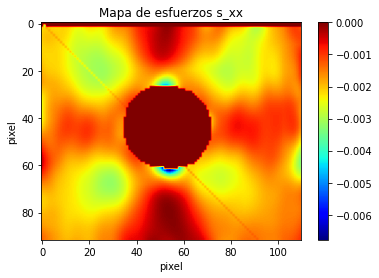

In [7]:
fig, ax = plt.subplots()

# ax.imshow(memo)
fxx = ax.imshow(sxx,cmap="jet")
fig.colorbar(fxx)
ax.set_title('Mapa de esfuerzos s_xx')
ax.set_xlabel('pixel')
ax.set_ylabel('pixel')
fig.savefig('../fig/sxx.png')

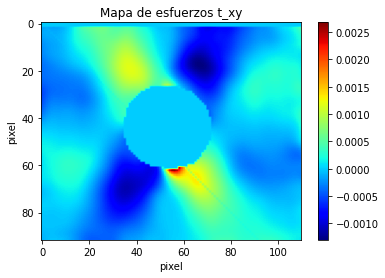

In [8]:
fig, ax = plt.subplots()

# ax.imshow(memo)
fxy = ax.imshow(txy,cmap="jet")
fig.colorbar(fxy)
ax.set_title('Mapa de esfuerzos t_xy')
ax.set_xlabel('pixel')
ax.set_ylabel('pixel')
fig.savefig('../fig/txy.png')

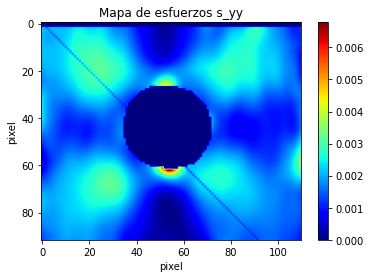

In [9]:
fig, ax = plt.subplots()

# ax.imshow(memo)
fyy = ax.imshow(syy,cmap="jet")
fig.colorbar(fyy)
ax.set_title('Mapa de esfuerzos s_yy')
ax.set_xlabel('pixel')
ax.set_ylabel('pixel')
fig.savefig('../fig/syy.png')

### Promedio de la matriz

In [10]:
sxx.mean()

-0.0015457603924388347

In [11]:
syy.mean()

0.0015434323002615892

In [12]:
txy.mean()

-1.6727891878872192e-05

### Obteniendo máximo valor de la matriz

In [13]:
sxx_p = abs(sxx)
sxx_p.max()

0.006779275005927986

In [15]:
txy_p = abs(txy)
txy_p.max()

0.002677792767734076

In [16]:
syy_p = abs(syy)
syy_p.max()

0.006779275005927984

### Factor de concentración de esfuerzos

In [18]:
# Esfuerzo nominal
s0 = 2500 / ((0.06-0.02)*0.004)
# Factor de concentración de esfuerzos Pa/Pa
K  = (syy_p.max()+sxx_p.max())/1000000000*s0
K

0.00021185234393524956